Importing the libraries

In [302]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import image

In [303]:
#first we need to extract the zip data present in our drive
!unzip drive/MyDrive/DataPre.zip > /dev/null

replace Excel_data/Top_setting.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [304]:
#loading images
import PIL
from PIL import Image
import glob
image_list = [] # will contain all the images in the rspective location
name = [] # will contain the name of respective images so that respective topology setting could be fetched from excel
for filename in glob.glob('/content/img/*.png'): #assuming gif
    im=Image.open(filename)
    name.append(filename)
    image_list.append(im)

numerics = []
for i in range(len(name)):
  a_string = name[i]
  numeric_filter = filter(str.isdigit, a_string)
  numeric_string = "".join(numeric_filter)
  numerics.append(numeric_string)

print(numerics)

['28', '36', '31', '50', '5', '96', '117', '77', '46', '48', '21', '62', '13', '110', '51', '100', '81', '23', '93', '16', '45', '1', '26', '66', '20', '82', '118', '106', '29', '80', '39', '75', '30', '64', '108', '92', '41', '3', '37', '84', '85', '42', '19', '4', '61', '89', '107', '73', '33', '78', '44', '116', '111', '105', '52', '6', '98', '99', '67', '65', '113', '69', '114', '38', '63', '11', '57', '90', '55', '104', '91', '97', '88', '40', '72', '9', '95', '119', '74', '43', '15', '49', '87', '7', '86', '70', '102', '101', '22', '2', '35', '27', '60', '8', '47', '112', '76', '32', '115', '56', '18', '71', '79', '34', '59', '12', '54', '109', '94', '17', '120', '14', '10', '103', '58', '68', '25', '53', '24', '83']


In [305]:
len(image_list)

120

In [306]:
#both image_list and numerics have 120 elements but their indexing starts from 0 hence last element is at index 119
#now lets convert our image_list array to a numpy array


# # example of converting an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

#the following loop will convert each elements (each images) to a numpy array  and resizing 
for i in range(len(image_list)):
  image_list[i] = img_to_array(image_list[i])
  # image_list[i]=np.resize(image_list[i],(800,800,3))
  
#follwoing line will convert the list to a numpy array with 120 elements and each element in respective size RGB
imgArr = np.array(image_list)

# for i in range(len(image_list)):
#   imgNpArr[i] = [img_to_array(image_list[i])]


# print("type:",img_array.dtype)
# print("shape:",img_array.shape)
# # convert back to image

# img_pil = array_to_img(img_array)
# print("converting NumPy array:",type(img_pil))

In [307]:
image_list[0].shape

(656, 875, 3)

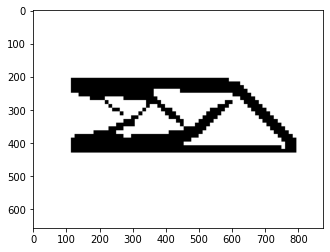

In [308]:
plt.imshow(image_list[2])

In [309]:
#now lets bring in the excel data file
dataset = pd.read_excel('/content/Excel_data/Top_setting.xlsx')
print(dataset)

     Volfrac  Fy  Fx  Images
0        0.4  10  10       1
1        0.4   9   9       2
2        0.4   8   8       3
3        0.4   7   7       4
4        0.4   6   6       5
..       ...  ..  ..     ...
115      0.6   5 -15     116
116      0.6   4 -12     117
117      0.6   3  -9     118
118      0.6   2  -6     119
119      0.6   1  -3     120

[120 rows x 4 columns]


In [310]:
#making of dependent and independent variables
x = dataset.iloc[:,:].values
xx = []
for i in range(0,len(numerics)):
  xx.append(x[int(numerics[i])-1])
x = xx #This will make elements of x in sync with the image array.

In [312]:
 x = np.array(x)
 print(type(x))
 print(type(imgArr))
 #Now we have our input array and output array
 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [313]:
imgArr.shape


(120, 656, 875, 3)

In [314]:
#Flattening the each image in imgArr so that each element will be a single column of nodes = 656*875*3
# flat_gfg = gfg.flatten()
#making a yArr which has dimension as (120,656*875*3) and then equating each element of it to the flattened image in next loop
yArr = imgArr
yArr = np.ndarray.reshape(yArr,(-1,656*875*3))

for i in range(imgArr.shape[0]):
  yArr[i] = imgArr[i].flatten()
yArr.shape

(120, 1722000)

In [349]:
#eliminating the 4th column in the x as now the input and output values are in sync so we dont require serial number.
x_final = []
# 

for i in range(x.shape[0]):
  x_final.append([x[i][0],x[i][1],x[i][2]])
x_final = np.array(x_final) 

#Now making the train test split
from sklearn.model_selection import train_test_split as tts
x_train , x_test , y_train , y_test = tts(x_final, yArr, test_size = 0.2, random_state = 0)


In [351]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(96, 3)
(24, 3)
(96, 1722000)
(24, 1722000)


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Feature Scaling

In [352]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Part 2 : Building ANN

In [362]:
#Initializing ANN
ann = tf.keras.models.Sequential()

#adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units =6 , activation = 'relu',input_shape = (3,)))

#adding the second hidden layer
ann.add(tf.keras.layers.Dense(units =6 , activation = 'relu'))

#adding the output layer
ann.add(tf.keras.layers.Dense(units =1722000 , activation = 'softmax'))

Part 3 : Training The ANN

In [363]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

Training the ANN on the training set

In [364]:
print(x_train.shape)
ann.summary()

(96, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 24        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1722000)           12054000  
                                                                 
Total params: 12,054,066
Trainable params: 12,054,066
Non-trainable params: 0
_________________________________________________________________


In [365]:
ann.fit(x_train, y_train,batch_size = 32 , epochs = 100)

Epoch 1/100
3/3 [==============================] - 5s 1s/step - loss: 5470178304.0000 - accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 5470084096.0000 - accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 3s 925ms/step - loss: 5469985280.0000 - accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 3s 918ms/step - loss: 5469882368.0000 - accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 5469772800.0000 - accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 5469660160.0000 - accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 3s 940ms/step - loss: 5469541376.0000 - accuracy: 0.0000e+00
Epoch 8/100
3/3 [==============================] - 3s 1s/step - loss: 5469414912.0000 - accuracy: 0.0000e+00
Epoch 9/100
3/3 [==============================] - 3s 1s/step - loss: 5469287936.0000 - accuracy: 0.0000e+00
Epoch 10/1

KeyboardInterrupt: ignored

Making the prediction and evaluating the model